In [ ]:
#ifif using colab
# ! pip install hmmlearn
# ! pip install yfinance

     |████████████████████████████████| 374 kB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 6.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Packages and Data Split

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
import numpy as np
from hmmlearn import hmm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm

In [28]:
# def  model_function(train_data -> np.array, num_of_predictions -> int):

# 	Return prediction 

In [29]:
aapl = yf.download("AAPL", start="2010-01-01", end="2021-10-31").reset_index()
aapl.Date = pd.to_datetime(aapl.Date)

[*********************100%***********************]  1 of 1 completed


In [30]:
daily_return = aapl['Return'] = aapl.Close.pct_change().dropna()

#(np.log(aapl.Close /aapl.Close.shift(-1))).dropna()
# np.log(aapl.Close.pct_change()).dropna()

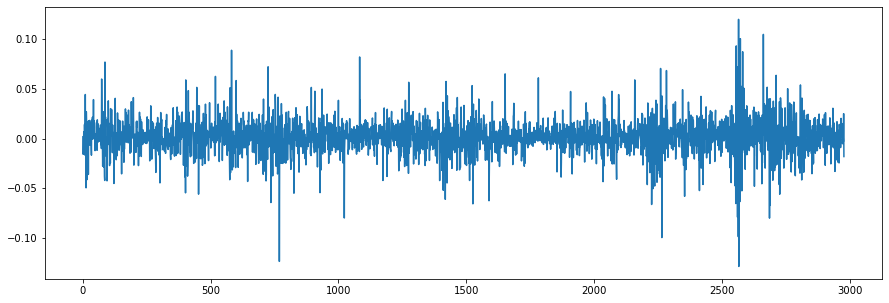

In [31]:
plt.plot(daily_return)

In [32]:
# train,test = aapl[aapl.Date<'2021-01-01'],aapl[aapl.Date>='2021-01-01']
train,test = daily_return[:2800],daily_return[2800:]

In [33]:
train_np = np.array(train).reshape(-1,1)
test_np = np.array(test).reshape(-1,1)

# HMM 

In [34]:
def hmm_prediction(train_data,num_of_predictions):
    hmm_model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
    hmm_model.fit(train_data)
    
    predict_state = hmm_model.predict(train_data)
    
    hmm_prediction = hmm_model.sample(num_of_predictions,random_state = predict_state[-1])
    hmm_prediction_value = hmm_prediction[0]
    hmm_prediction_states = hmm_prediction[1]
    
    return hmm_prediction_value

In [35]:
hmm_prediction(train_np,10)

array([[ 0.0023149 ],
       [-0.00314091],
       [-0.01040529],
       [-0.00521239],
       [ 0.01019676],
       [-0.01437021],
       [-0.01358276],
       [ 0.00245936],
       [ 0.01554514],
       [ 0.00156895]])

In [36]:
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
remodel.fit(train_np)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [37]:
plot_data = train_np
predict_state = remodel.predict(plot_data)

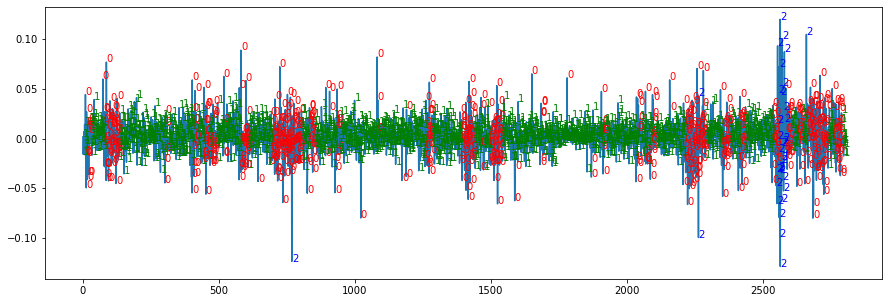

In [38]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(plot_data)
color_set = ['r','g','b']
for i, txt in enumerate(predict_state):
    plt.annotate(int(txt), (i, plot_data[i]),c=color_set[int(txt)])

In [39]:
hmm_prediction = remodel.sample(len(test_np),random_state = predict_state[-1])
hmm_prediction_value = hmm_prediction[0]
hmm_prediction_states = hmm_prediction[1]

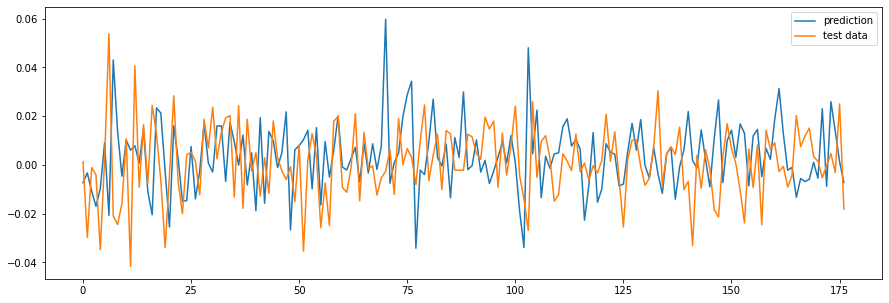

In [40]:
plt.plot(hmm_prediction_value,label = 'prediction')
plt.plot(test_np, label = 'test data')
plt.legend()

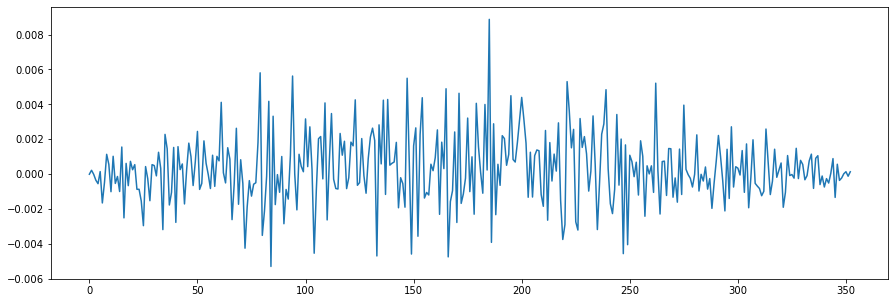

In [44]:
import scipy
plt.plot(scipy.signal.correlate(test_np,hmm_prediction_value))

In [18]:
mean_absolute_percentage_error(test_np,hmm_prediction_value)

5.073898166171077

In [19]:
mean_squared_error(test_np,hmm_prediction_value)

0.0005352728161306793

In [22]:
sm.tsa.stattools.ccf(test_np, hmm_prediction_value)

array([-2.73083883e-03,  1.24089622e-02, -2.88930687e-02, -1.10431268e-04,
        2.32674700e-02, -1.57732946e-02,  4.10732649e-02,  1.08559192e-01,
       -3.62654803e-02,  2.45503012e-01, -1.02437171e-01,  5.83303760e-02,
       -8.26354695e-02, -1.13333901e-02, -6.23242349e-02,  7.37088262e-02,
        3.09726776e-02,  5.09343741e-03,  2.81532425e-03,  5.64199550e-02,
        2.21408776e-02, -4.43753801e-02,  1.08167297e-01,  4.09264351e-02,
        8.00083860e-02,  4.68323552e-03,  4.44784060e-02, -5.82421058e-02,
        1.50647487e-02, -1.11426760e-01,  3.18046739e-02, -2.46653245e-02,
       -4.27684878e-03, -3.10993233e-02, -5.80066653e-02,  3.11906648e-04,
       -3.64562546e-02,  1.68238079e-02,  3.91109263e-03,  1.83985261e-02,
        2.86107059e-02,  4.74389861e-02, -7.50325339e-02, -1.30054880e-01,
       -1.15729356e-01,  1.24278348e-01,  9.37934282e-02,  8.36927440e-02,
        6.17805882e-02, -1.00408918e-01, -1.01559344e-01,  1.79953283e-02,
        7.87229493e-02, -

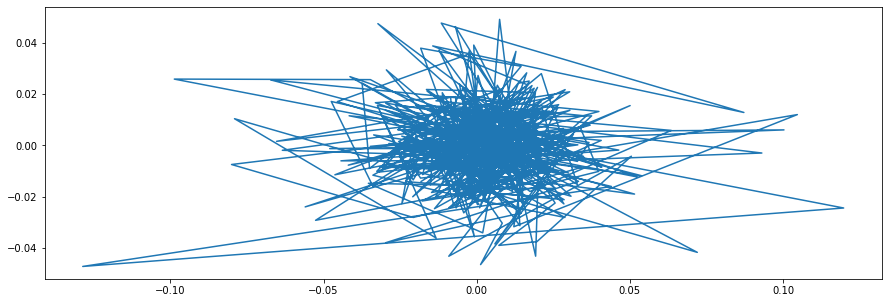

In [ ]:
plt.plot(test_np,hmm_prediction_value)

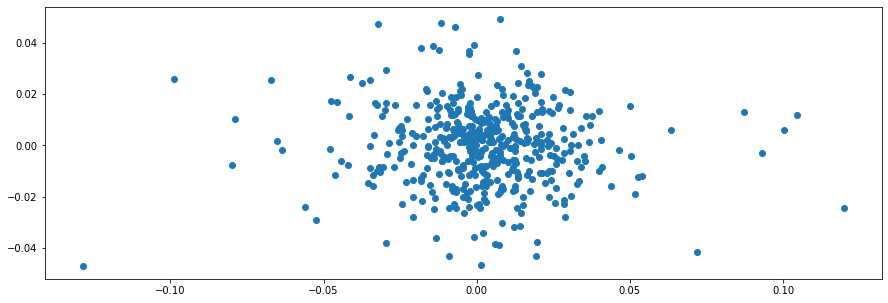

In [ ]:
plt.scatter(test_np,hmm_prediction_value)